<a href="https://colab.research.google.com/github/DanaZaretska/ML-Experiments/blob/main/GAN_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

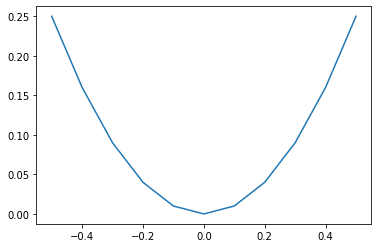

In [ ]:
# demonstrate simple x^2 function
from matplotlib import pyplot

# simple function
def calculate(x):
    return x * x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

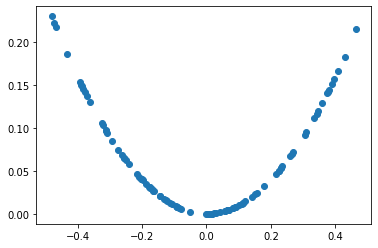

In [ ]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

249 0.5099999904632568 0.75


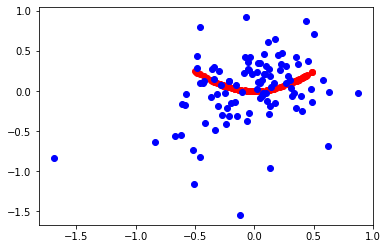

499 0.9700000286102295 0.09000000357627869


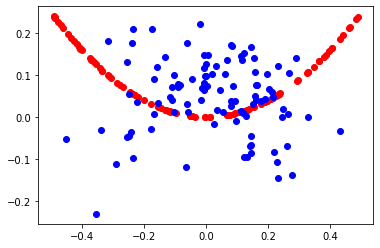

749 0.44999998807907104 0.4399999976158142


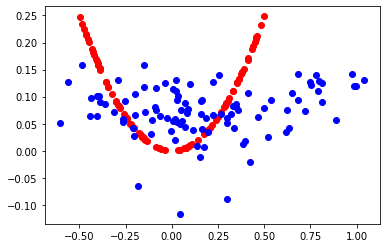

999 0.44999998807907104 0.9900000095367432


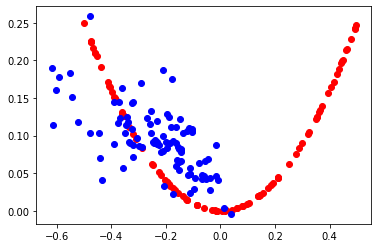

1249 0.4699999988079071 0.38999998569488525


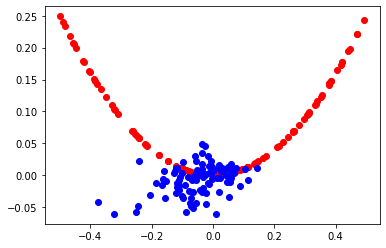

1499 0.47999998927116394 1.0


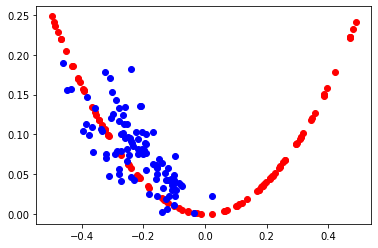

1749 0.5199999809265137 0.0


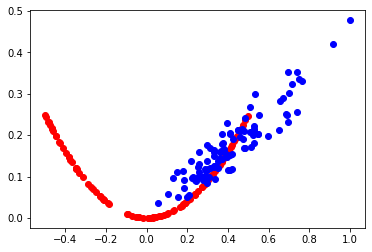

1999 0.28999999165534973 0.8899999856948853


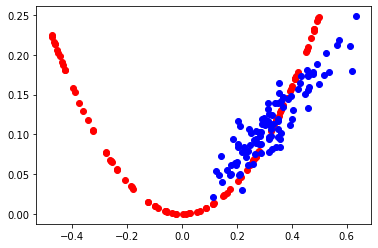

2249 0.4399999976158142 0.9900000095367432


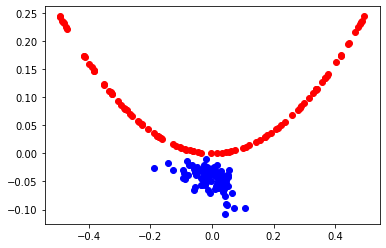

2499 0.46000000834465027 1.0


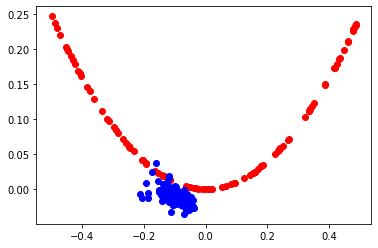

2749 0.4000000059604645 1.0


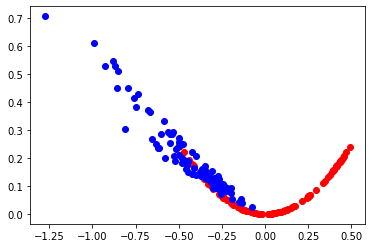

2999 0.46000000834465027 0.8500000238418579


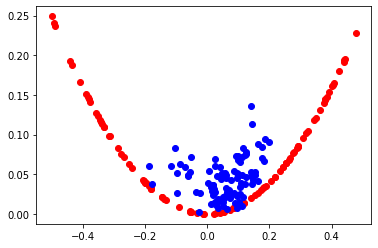

3249 0.4099999964237213 1.0


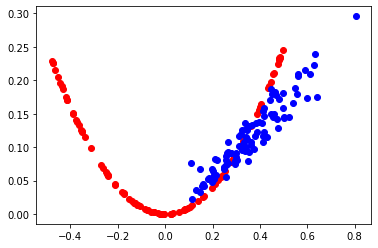

3499 0.47999998927116394 0.27000001072883606


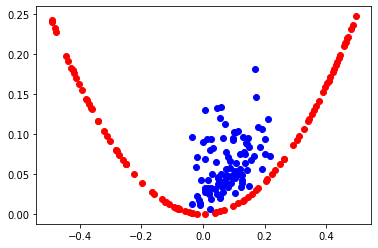

3749 0.4699999988079071 1.0


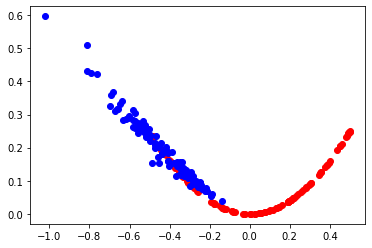

3999 0.5600000023841858 1.0


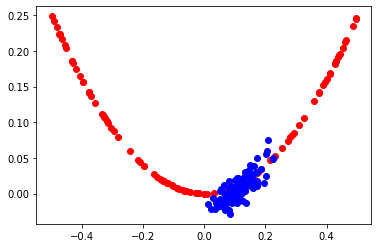

4249 0.4699999988079071 0.8999999761581421


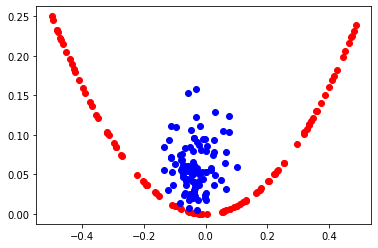

4499 0.4699999988079071 0.029999999329447746


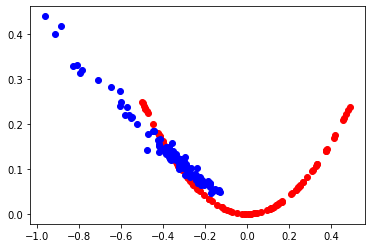

4749 0.6200000047683716 0.0


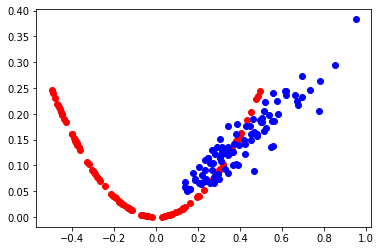

4999 0.3700000047683716 1.0


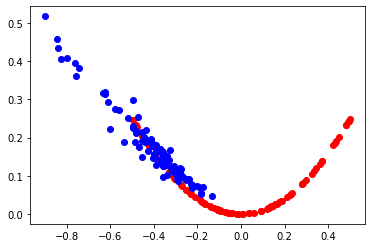

5249 0.36000001430511475 1.0


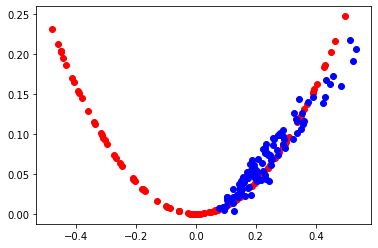

5499 0.4000000059604645 1.0


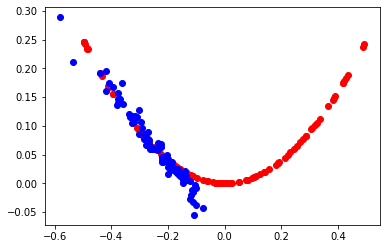

5749 0.3799999952316284 1.0


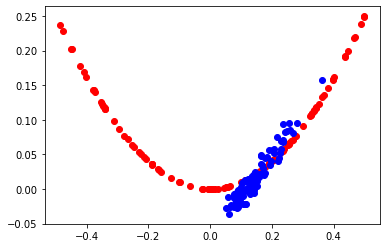

5999 0.47999998927116394 1.0


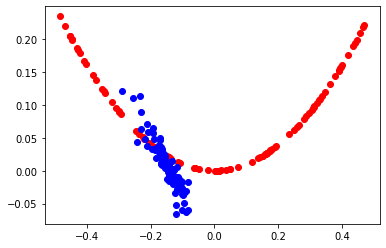

6249 0.4099999964237213 1.0


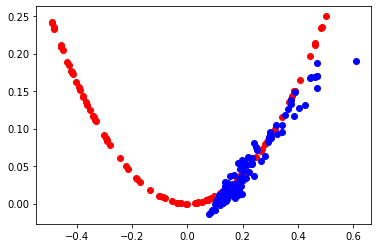

6499 0.44999998807907104 1.0


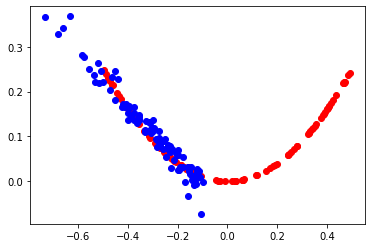

6749 0.3499999940395355 1.0


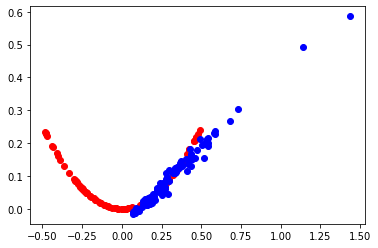

6999 0.46000000834465027 1.0


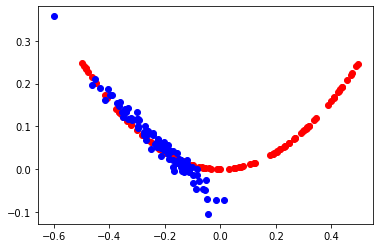

7249 0.27000001072883606 0.8199999928474426


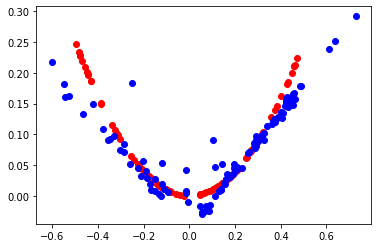

7499 0.6000000238418579 0.4000000059604645


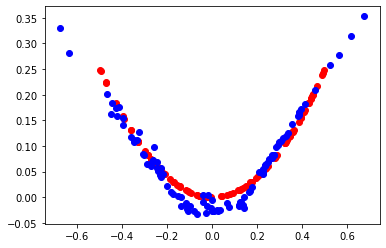

7749 0.5699999928474426 0.44999998807907104


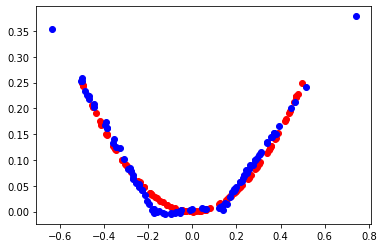

7999 0.5 0.4300000071525574


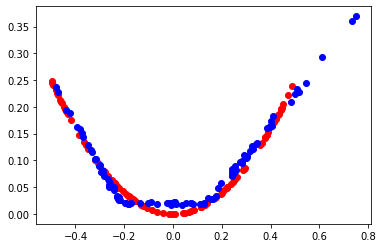

8249 0.46000000834465027 0.5400000214576721


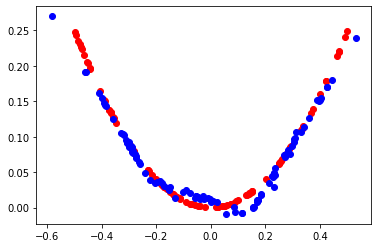

8499 0.5400000214576721 0.5099999904632568


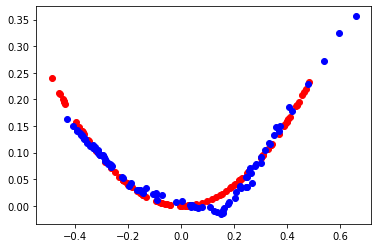

8749 0.3799999952316284 0.5600000023841858


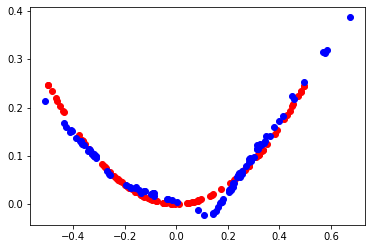

8999 0.3400000035762787 0.7099999785423279


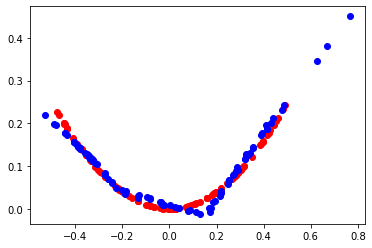

9249 0.3400000035762787 0.7099999785423279


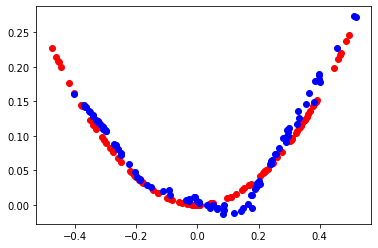

9499 0.4099999964237213 0.6499999761581421


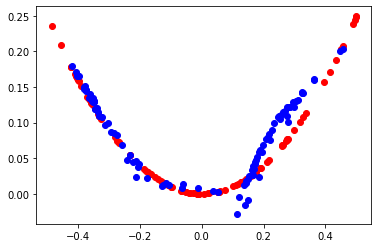

9749 0.33000001311302185 0.75


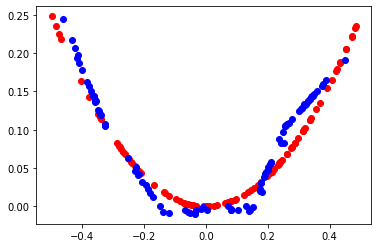

9999 0.41999998688697815 0.5899999737739563


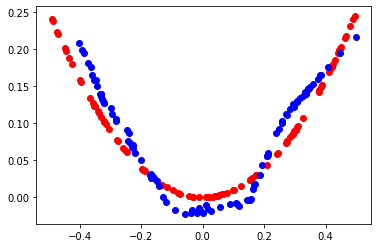

10249 0.5400000214576721 0.5199999809265137


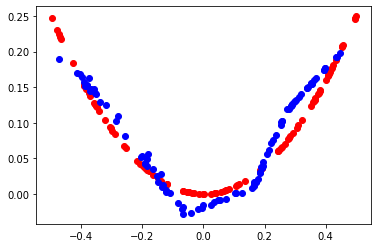

10499 0.5199999809265137 0.5699999928474426


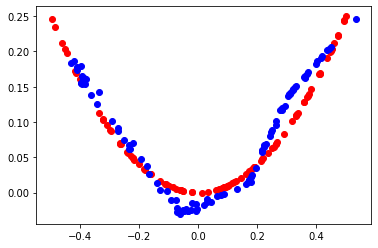

10749 0.5899999737739563 0.3700000047683716


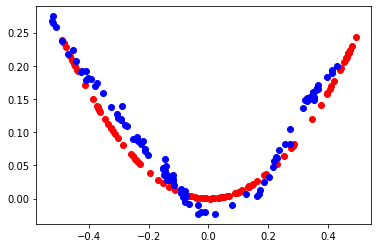

10999 0.20000000298023224 0.5899999737739563


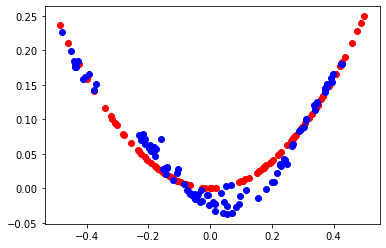

11249 0.3199999928474426 0.5699999928474426


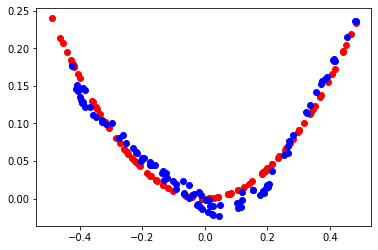

11499 0.5400000214576721 0.5799999833106995


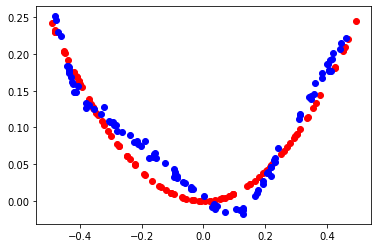

11749 0.33000001311302185 0.6200000047683716


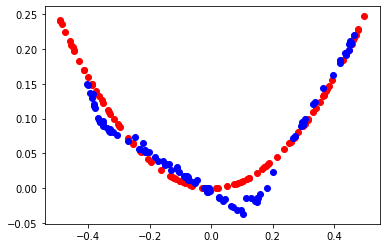

11999 0.12999999523162842 0.7699999809265137


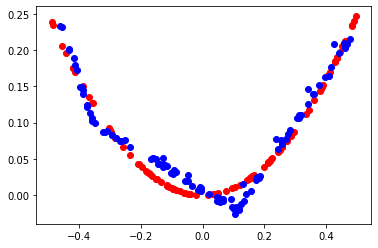

12249 0.3100000023841858 0.6700000166893005


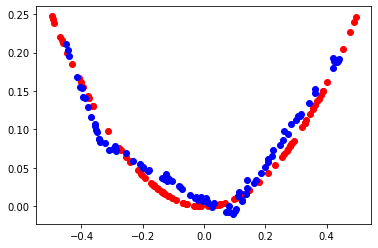

12499 0.23999999463558197 0.6899999976158142


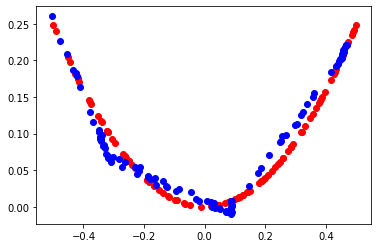

12749 0.3199999928474426 0.6399999856948853


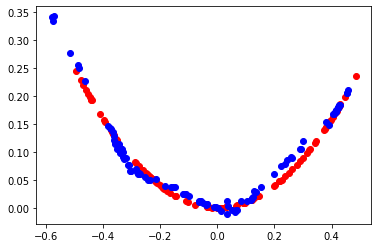

12999 0.5199999809265137 0.5899999737739563


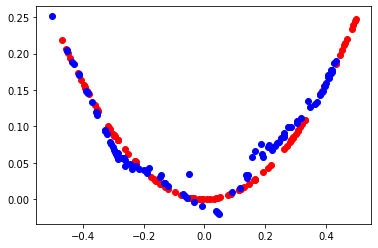

13249 0.5699999928474426 0.5899999737739563


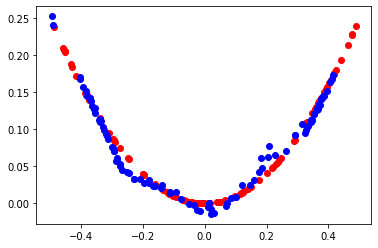

13499 0.6000000238418579 0.3700000047683716


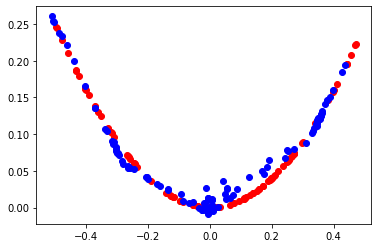

13749 0.5899999737739563 0.41999998688697815


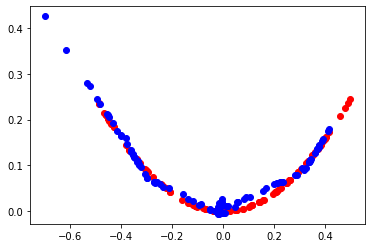

13999 0.5899999737739563 0.6200000047683716


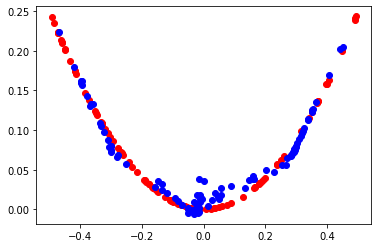

14249 0.4699999988079071 0.5699999928474426


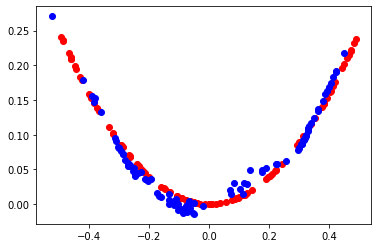

14499 0.5799999833106995 0.5299999713897705


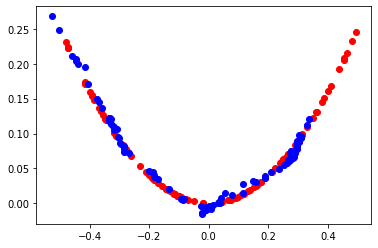

14749 0.75 0.3799999952316284


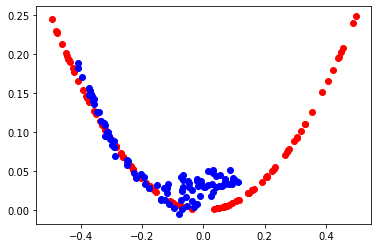

14999 0.8399999737739563 0.14000000059604645


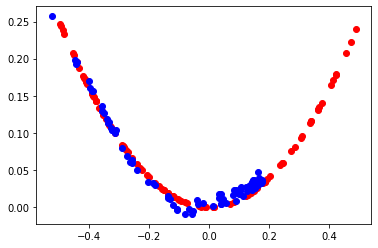

In [ ]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=15000, n_batch=128, n_eval=250):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [ ]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

n = 4
X1 = rand(n) - 0.5
# generate outputs X^2
X2 = X1 * X1
# stack arrays
X1 = X1.reshape(n, 1)
X2 = X2.reshape(n, 1)
X = hstack((X1, X2))
# generate class labels
y = ones((n, 1))

In [ ]:
X1

array([[ 0.49412905],
       [ 0.34235249],
       [-0.40055785],
       [-0.39457531]])